 # Compare old and new solutions visually, and evaluate roundtrip errors #

In [1]:
import miricoord.miricoord.mrs.mrs_tools as mt
import numpy as np
from numpy import matlib as mb
import matplotlib.pyplot as plt

In [2]:
# All pixels
channel='1A'
ymin,ymax=0,1024#500,501
xmin,xmax=0,512#513,1031#0,512

In [3]:
# All pixels
xrow=np.mgrid[xmin:xmax]
yrow=np.mgrid[ymin:ymax]
xall=mb.repmat(xrow,yrow.size,1)*1.
yall=mb.repmat(yrow,xrow.size,1)*1.
yall=np.transpose(yall)
# Recast as 1d arrays
xall=xall.reshape(-1)
yall=yall.reshape(-1)

In [4]:
# CDP-6
mt.set_toolversion('cdp6')

In [5]:
# Convert to alpha/beta
values_cdp6=mt.xytoabl(xall,yall,channel,trim=1)
alpha_cdp6=values_cdp6['alpha']
beta_cdp6=values_cdp6['beta']
lam_cdp6=values_cdp6['lam']

In [6]:
v2_cdp6,v3_cdp6=mt.abtov2v3(alpha_cdp6,beta_cdp6,channel)

In [7]:
alpha2_cdp6,beta2_cdp6=mt.v2v3toab(v2_cdp6,v3_cdp6,channel)

In [8]:
values2_cdp6=mt.abltoxy(alpha2_cdp6,beta2_cdp6,lam_cdp6,channel)

In [9]:
# CDP-8b
mt.set_toolversion('cdp8b')

In [10]:
# Convert to alpha/beta
values=mt.xytoabl(xall,yall,channel,trim=1)
alpha=values['alpha']
beta=values['beta']
lam=values['lam']

In [11]:
v2,v3=mt.abtov2v3(alpha,beta,channel)

In [12]:
alpha2,beta2=mt.v2v3toab(v2,v3,channel)

In [13]:
values2=mt.abltoxy(alpha2,beta2,lam,channel)

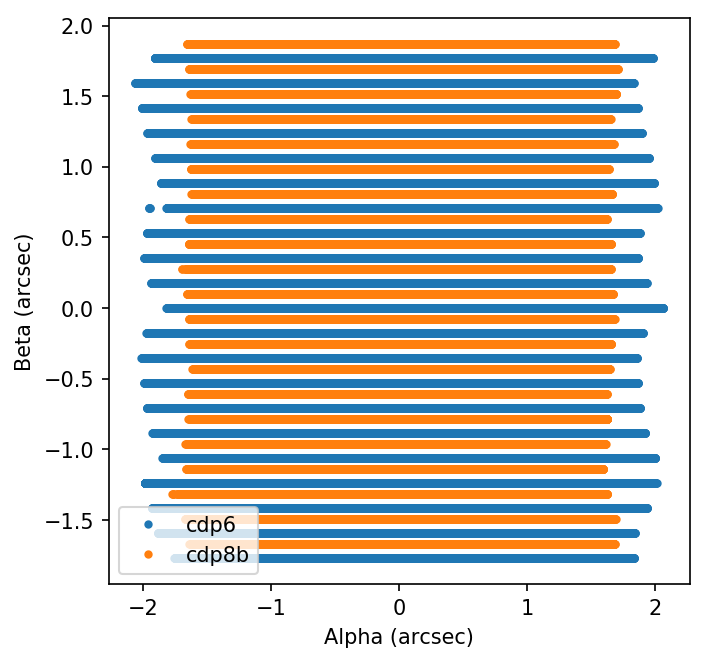

In [14]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()
plt.plot(alpha_cdp6,beta_cdp6,'.',label='cdp6')
plt.plot(alpha,beta+0.1,'.',label='cdp8b')
plt.xlabel('Alpha (arcsec)')
plt.ylabel('Beta (arcsec)')
plt.legend()

In [15]:
print(np.mean(alpha_cdp6),np.mean(alpha))

-0.011149477032416885 0.008514680587348576


In [26]:
print(np.max(alpha),np.min(alpha))

1.7084592984510678 -1.7738512901914874


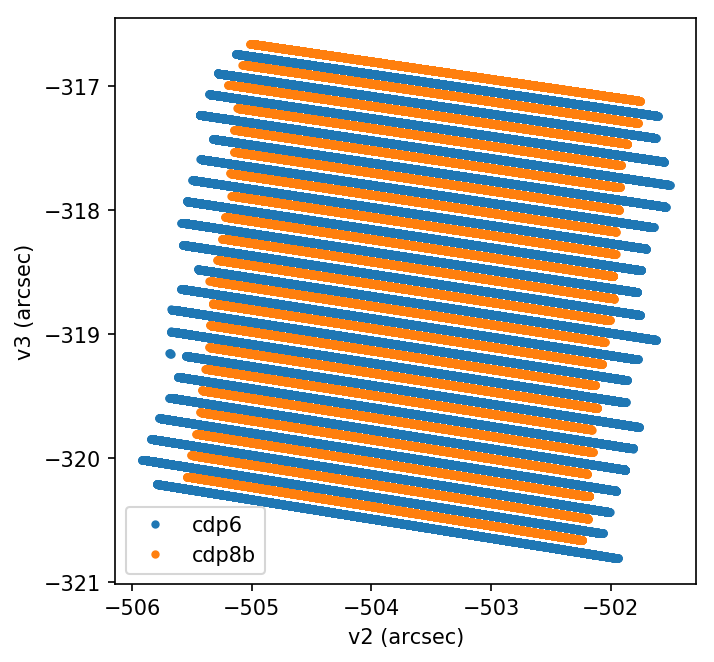

In [17]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.gca()
plt.plot(v2_cdp6,v3_cdp6,'.',label='cdp6')
plt.plot(v2,v3+0.1,'.',label='cdp8b')
plt.xlabel('v2 (arcsec)')
plt.ylabel('v3 (arcsec)')
plt.legend()
#plt.xlim(-505.5, -505.0)
#plt.ylim(-320.5,-320)

In [18]:
da=alpha-alpha2
db=beta-beta2

#indx=(np.where((values2['slicenum'] > 0) ))[0]
indx=(np.where((values2['x'] > -300) ))[0]


dx=values['x']-values2['x']
dx=dx[indx]
dy=values['y']-values2['y']
dy=dy[indx]

In [19]:
indx.shape

(365655,)

In [20]:
values2_cdp6['alpha'][indx[0]],values2_cdp6['beta'][indx[0]],values2_cdp6['lam'][indx[0]]

(-1.6913637787418736, -0.0013622207216599236, 4.881382961111468)

In [21]:
mt.abltoxy(1.8553658798060155, -0.0013983357260940465, 4.882157946937771,'1A')

{'x': array([-999.]),
 'y': array([-999.]),
 'alpha': array([1.85536588]),
 'beta': array([-0.00139834]),
 'lam': array([4.88215795]),
 'slicenum': array([11]),
 'slicename': array(['111A'], dtype='<U4'),
 'slicephase': array([-999.]),
 'pixelphase': array([-999.])}

In [22]:
test=values2['x']
test=test[indx]
test.shape

(365655,)

(array([26188., 38247., 38788., 38954., 38483., 38692., 38771., 38935.,
        38222., 30375.]),
 array([-1.72853907, -1.38477932, -1.04101957, -0.69725982, -0.35350007,
        -0.00974032,  0.33401943,  0.67777918,  1.02153893,  1.36529869,
         1.70905844]),
 <a list of 10 Patch objects>)

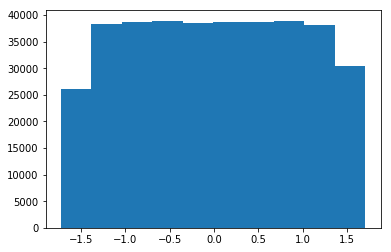

In [23]:
junk=values2['alpha'][indx]
plt.hist(junk)

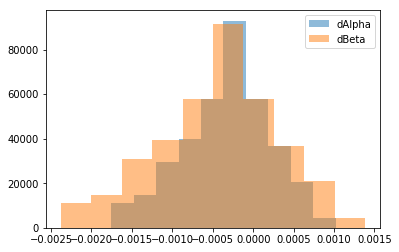

In [24]:
plt.hist(da,alpha=0.5,label='dAlpha')
plt.hist(db,alpha=0.5,label='dBeta')
plt.legend()

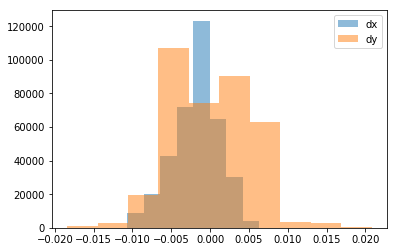

In [25]:
plt.hist(dx,alpha=0.5,label='dx')
plt.hist(dy,alpha=0.5,label='dy')
plt.legend()